# Best markets to advertise in

## Introduction

For this project we'll assume we work for an **e-learning** company that offers courses on programming.
Mostly, company's courses are on **web** and **app** development, but it also cover other domains like **data science**. What we want to do is to promote our products by investing some money in advertisement.

Our goal will be to find out the best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choice for advertising. However, this would end up being extremely costly and it's a good point to explore cheaper options.

We can try to search existing data that might be relevant for our purpose. 

One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey.](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because their community is followed by over 400.000 users, their survey attracted new coders with various interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

We'll start with a brief exploration of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False) # setting False to silence DtypeWarning

## Shape of the dataset

In [2]:
print(f"The dataset is composed by {data.shape[0]} rows and {data.shape[1]} columns")

The dataset is composed by 18175 rows and 136 columns


There are **136** columns in this dataframe.
We'll now check each column and see which one can be usefull for our purpose.

In [3]:
for col in data.columns:
    print(col)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


In [4]:
pd.set_option('display.max_columns', None)
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Each column is quite self explanatory and what we want to do is to find which one can be usefull for our task.

We'll start by considering columns like:

* Age
* CityPopulation
* CountryCitizen
* CountryLive
* EmploymentField
* EmploymentStatus
* ExpectedEarning
* Gender
* Income
* JobPref
* JobRoleInterest
* LanguageAtHome
* MonthsProgramming 

As we mentioned before, our platform is focused on offering courses about **web-development**, **app-development** and also **datascience**.
To answer our questions, we have to find a population of coders whom could be interested in buying some of our products.

To do so we want to know:

* The country from where the coders come
* Which are the countries with the highest number of coders
* How much money possible new users of our platform are willing to spend.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The ```JobRoleInterest``` column describes for every participant the role or roles they'd be interested in working.
We'll start by digging into that column

In [5]:
data.JobRoleInterest.value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                                    2.030892
  Mobile Developer          

In [6]:
for job in data['JobRoleInterest'].unique():
    print(job)

nan
Full-Stack Web Developer
  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer
  Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer
Full-Stack Web Developer, Information Security,   Mobile Developer,   Front-End Web Developer, Back-End Web Developer
Full-Stack Web Developer,   Quality Assurance Engineer, Game Developer, Back-End Web Developer,   User Experience Designer,   Front-End Web Developer
  DevOps / SysAdmin,   Data Scientist, Information Security, Data Engineer
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer
Full-Stack Web Developer,   Front-End Web Developer,   User Experience Designer, Back-End Web Developer
  Front-End Web Developer,   Mobile Developer, Game Developer, Full-Stack Web Developer
Information Security
Back-End Web Developer
  Front-End Web Developer,   Data Scientist, Full-Stack Web Developer,   Mobile Developer
Back-End Web Developer, Full-Stac

Looks like the data are grouped in an extremely granular way. Some of the users answered with just one role some other with more than one job they could be interested in.
In this way, we can't properly define the percentage we could find usefull to advertise in. To do so, we'll have to reshape the **JobRoleInterest** column in a way that can show us some relevant data.

We know that our platform's core business is to provide web courses about **web-development**, **app (mobile) development** or **datascience**. We're going to look for those rows that contain these namefield; but first we want to check the percentage of null values in the colum

## Checking null values

In [7]:
print("Percentage of null values is: ")
round(data.JobRoleInterest.isnull().sum() / data.shape[0] * 100, 2)

Percentage of null values is: 


61.53

It turns out that **61.53 %** of the users didn't declare anything specific about what could be considered by them as a field of interest during their learning path.
At this point, we have to state that, even though we will continue on our analysis, the sample we're investigating can't be considered highly representative of the entire population, due to the percentage of useless or null data.

We'll just drop those rows.

In [8]:
# dropping null values

non_null = data.dropna(subset=['JobRoleInterest'])

# checking for 'Web Developer', 'Data' or 'Mobile' related jobs

web_app_data = non_null.JobRoleInterest.str.contains('Web Developer|Data|Mobile')

freq_table = web_app_data.value_counts(normalize=True) * 100
print(freq_table)

True     92.319794
False     7.680206
Name: JobRoleInterest, dtype: float64


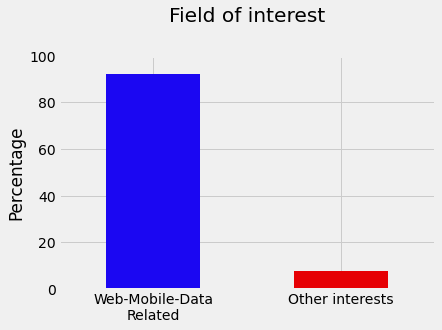

In [9]:
plt.style.use('fivethirtyeight')

freq_table.plot.bar(color=['#1b07f2', '#e60004'])
plt.title('Field of interest', y=1.12)
plt.ylim((0,100))
plt.ylabel('Percentage')
plt.xticks([0, 1],['Web-Mobile-Data\nRelated', 'Other interests'], rotation=0)
plt.show()

**92.31 %** percent of the users show interest for jobs related to our online courses (either Web development, Mobile App develompent or job positions related to data).
We can say now that the sample we used can be strongly representative for the population we're interested.
We want to advertise those particular kind of users who are interested in those fields shown above.

Especially we'll want to find if there is any difference among **Web Developer**, **Mobile Developer** and **Data related** and the amount of money each user spends monthly so to create some marketing strategy that can be highly effective; but this will represent the last part of our analysis.

For the moment we can start with finding out where these new coders are located and how many users each country has.
The dataframe has two columns that can be usefull for our task: ```CountryCitizen``` and ```CountryLive```.

```CountryCitizen``` describes the country of origin for each participant, and the ```CountryLive``` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the ```CountryLive``` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

## Country Analysis

In [10]:
print("Top 10 countries per number of users:")
non_null.CountryLive.value_counts()[:10]

Top 10 countries per number of users:


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [11]:
print("Top 10 countries percentage:")
(round(non_null.CountryLive.value_counts(normalize=True) * 100, 2))[:10]

Top 10 countries percentage:


United States of America    45.70
India                        7.72
United Kingdom               4.61
Canada                       3.80
Poland                       1.92
Brazil                       1.89
Germany                      1.83
Australia                    1.64
Russia                       1.49
Ukraine                      1.30
Name: CountryLive, dtype: float64

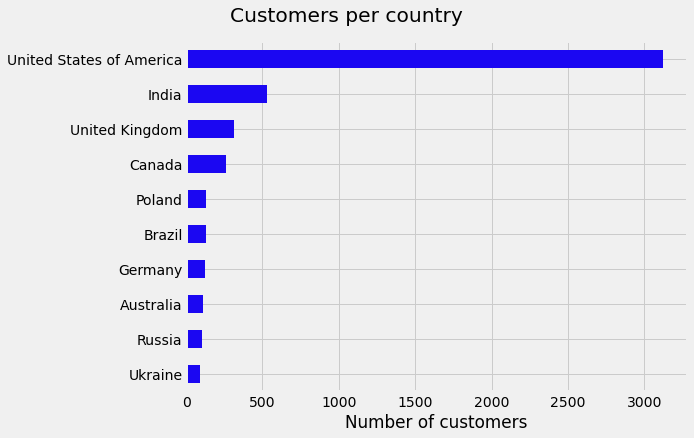

In [12]:
# visualize results

plt.figure(figsize=(8,6))
non_null.CountryLive.value_counts()[:10][::-1].plot.barh(color='#1b07f2')
plt.xlabel('Number of customers')
plt.title('Customers per country', x=0.32, y=1.04)
plt.show()

In [13]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

We now showed the 10 countries with the highest number of new coders.

It's remarkable **USA** that with its **3125** users, representing the **45.70 %** of the entire market, is on the first place.

### Summary:

| Country        | Users'tally| Percentage |
|----------------|-----------|------------|
| USA            | 3125      | 45.70      |
| India          | 528       | 7.72       |
| United Kingdom | 315       | 4.61       |
| Canada         | 260       | 3.80       |
| Poland         | 131       | 1.92       |
| Brazil         | 129       | 1.89       |
| Germany        | 125       | 1.83       |
| Australia      | 112       | 1.64       |
| Russia         | 102       | 1.49       |
| Ukraine        | 89        | 1.30       |

Based on this table, we could say that the best two markets for advertisement could be **USA** and **India** because they have the highest number of users but it would be kind of hasty to stop our analysis at this point.

We want to dig deeper by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The ```MoneyForLearning``` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

Considering the fact that there these are the countires which are can be most representative, we'll keep on working with this Top 10.

What we'll do is just dropping those rows whose ```CountryLive``` has less than **89** users.

After that we'll create a new column that calculate the monthly expense per user.

In [14]:
# masking condition

counts = non_null.CountryLive.value_counts()

# filtering

top_10 = non_null[~non_null['CountryLive'].isin(counts[counts < 89].index)].copy()

In [15]:
# checking

top_10.CountryLive.value_counts(ascending=True)

Ukraine                       89
Russia                       102
Australia                    112
Germany                      125
Brazil                       129
Poland                       131
Canada                       260
United Kingdom               315
India                        528
United States of America    3125
Name: CountryLive, dtype: int64

In [16]:
# unique values for MonthLearning

top_10.MonthsProgramming.unique()

array([  6.,   5.,  12.,   1.,  nan,   9.,  14.,  28.,   3.,   2.,  25.,
         8.,  60.,  18.,  19.,  36.,  24.,  40.,  20.,   4.,   0.,  48.,
        16.,  26.,  13.,  10.,  11.,  30.,  29.,  15.,  72.,   7.,  17.,
        54.,  84., 240.,  42.,  50.,  34.,  55.,  59.,  70.,  44.,  49.,
        21.,  96.,  45.,  32., 108.,  39., 120.,  31.,  43.,  33.,  52.,
        41.,  23.,  27., 200., 180., 100., 360., 113., 144.,  73.,  83.,
       190.,  35.,  38.,  80., 744.,  69., 156.,  22., 171.,  37., 198.,
        58., 480., 111., 408., 300.,  89.])

As we can see there are some values that are values like **nan** or **0**.
We could assume that those values represent persons who just started their journey to code so we'll replace those values with **1** as if they were in their first month.

This way we'll be able to calculate monthly expenses for each row.

In [17]:
# filling null values

top_10.MonthsProgramming.fillna(1, inplace=True)

# replacing 0 with 1

top_10['MonthsProgramming'].replace(0, 1, inplace=True)

In [18]:
# checking

top_10.MonthsProgramming.value_counts()

1.0      1001
2.0       480
6.0       473
3.0       458
12.0      457
         ... 
408.0       1
180.0       1
190.0       1
49.0        1
73.0        1
Name: MonthsProgramming, Length: 81, dtype: int64

At this point we can create the new column we were talking about.
We'll divide ```MoneyForLearning``` for ```MonthsProgramming``` and we should get the amount of money each user spend per month.

In [19]:
top_10['MoneyForMonth'] = top_10['MoneyForLearning'] / top_10['MonthsProgramming']

Created a new column, we want to check how many null values are in the ```CountryLive``` column.

We want to group by using the country, so it would be useless to keep those rows in which the country is not present.

In [20]:
print(top_10.CountryLive.isnull().sum())

154


154 rows have country missing.
We'll drop them

In [21]:
top_10.dropna(subset=['CountryLive'], inplace=True)

In [22]:
# checking

print(top_10.CountryLive.isnull().sum())

0


We'll group the remaining data by the ```CountryLive``` column and find out how much money each student spend on average for each country.

In [23]:
grouped = top_10.groupby('CountryLive')['MoneyForMonth'].mean()\
          .sort_values(ascending=False).to_frame()

grouped

,MoneyForMonth
CountryLive,
Australia,459.282521
Russia,274.934233
United States of America,237.153631
India,134.054914
Canada,132.223896
Poland,75.264759
Brazil,74.057664
Germany,63.172479
Ukraine,54.314874


<Figure size 864x432 with 0 Axes>

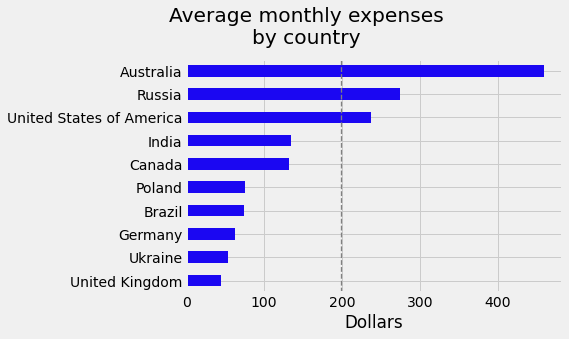

In [24]:
plt.figure(figsize=(12,6))
grouped[::-1].plot.barh(color='#1b07f2')
plt.xlabel('Dollars')
plt.ylabel('')
plt.legend().set_visible(False)

plt.axvline(top_10.MoneyForMonth.mean(),
           color='grey',
           linestyle='--',
           lw=1.3)
plt.title('Average monthly expenses\nby country',x=0.32, y=1.04)
plt.show()

If we set the mean for the monthly expenses (which is roughly **200** dollars) as a benchmark, we can see that customers from  spend averagely much more than the mean (almost **460** dollars per month), followed by **russians** with almost **275** dollars and **north americans** with **237** dollars per month.

The results for the **United Kingdom** and **Canada** are surprisingly low relative to the values we see for **India** or **Russia** itself. 

It might be that we don't have have enough representative data for the **United Kingdom**, **Canada**, **India** and **Russia** or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

We'll generate four box plots to visualize for each of those 4 countries how the distribution of that variable behave and if we can find any extreme outlier.

In [25]:
# stratifying by country

strat = top_10[top_10.CountryLive.str.contains('United Kingdom|Canada|India|Russia')]

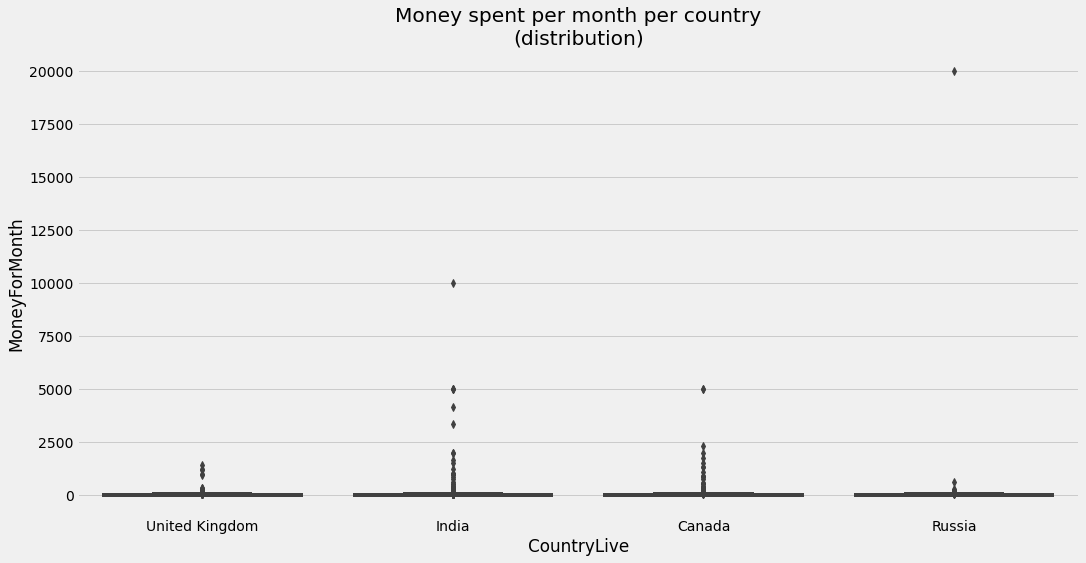

In [26]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(x='CountryLive',
            y='MoneyForMonth',
            data=strat)
plt.title('Money spent per month per country\n(distribution)')
plt.show()

We can see that for what concern **India** and **Russia** we're dealing with some extreme outliers.
Someone in India seems to spend **10000** dollars per month, someother in **Russia** even **20000**. That's almost impossible so what we'll do is to remove every value that goes over **10000**.

In [27]:
# fixing values

top_10_fixed = top_10[top_10.MoneyForMonth < 10000]

In [28]:
# regrouping

grouped = top_10_fixed.groupby('CountryLive')['MoneyForMonth'].mean()\
          .sort_values(ascending=False).to_frame()

grouped

,MoneyForMonth
CountryLive,
Australia,269.566817
United States of America,159.839320
Canada,132.223896
India,112.973835
Poland,75.264759
Brazil,74.057664
Germany,63.172479
Ukraine,54.314874
United Kingdom,44.419964


Let's see now how the same countries distribution behave.

In [29]:
strat = top_10_fixed[top_10_fixed['CountryLive'].str.contains('United Kingdom|Canada|India|Russia')]

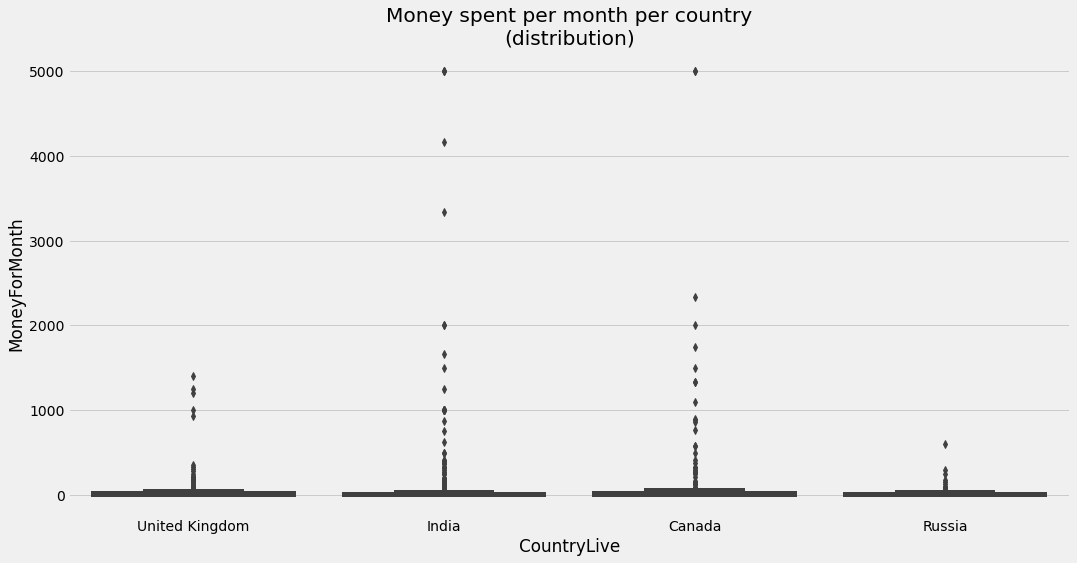

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(x='CountryLive',
            y='MoneyForMonth',
            data=strat)
plt.title('Money spent per month per country\n(distribution)')
plt.show()

There are still some outliers in countries like **India** or **Canada**. Some of the user spend more than 3000 euros per month. This could be caused by someone of them attending a bootcamp.
Let's check if that is true

In [31]:
outlier = strat[strat.MoneyForMonth > 3000 & strat.CountryLive.str.contains('India|Canada')]

In [32]:
outlier.AttendedBootcamp.value_counts()

0.0    465
1.0     22
Name: AttendedBootcamp, dtype: int64

Looks like that 465 users didn't attend any bootcamp. For this reason it's highly impossible that they spend more than 3000 $ each month even without attending an expensive course.

It seems that they probably got wrong while answering the questions of the survey.

For this reason we're going to drop those columns.

In [33]:
indexes = outlier[outlier.AttendedBootcamp == 0].index

no_outlier = top_10_fixed.drop(indexes).copy()

In [34]:
# regrouping

grouped = no_outlier.groupby('CountryLive')['MoneyForMonth'].mean()\
          .sort_values(ascending=False).to_frame()

grouped

,MoneyForMonth
CountryLive,
Australia,269.566817
United States of America,159.839320
Canada,90.530632
Poland,75.264759
Brazil,74.057664
Germany,63.172479
Ukraine,54.314874
United Kingdom,21.615091
Russia,7.767857


Imagine we sell subscription for 59 $ per month.
Which would be the country to choose?

<Figure size 864x432 with 0 Axes>

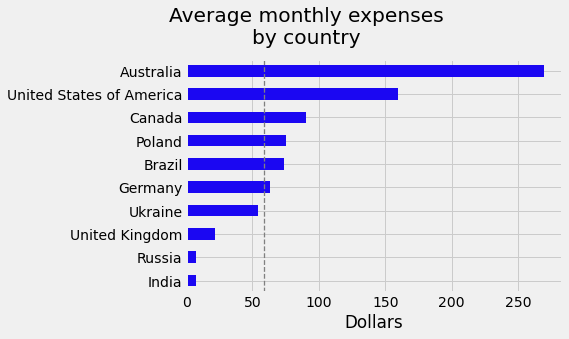

In [35]:
sub = 59

plt.figure(figsize=(12,6))
grouped[::-1].plot.barh(color='#1b07f2')
plt.xlabel('Dollars')
plt.ylabel('')
plt.legend().set_visible(False)

# plotting the subscription value as a vertical line
plt.axvline(sub,
           color='grey',
           linestyle='--',
           lw=1.3)

plt.title('Average monthly expenses\nby country',x=0.32, y=1.04)
plt.show()

By taking into account the number of users and the average month expense, we can conclude that two countries where we should advertise would be:

| Country | User's tally | Monthly expense (AVG) |
|---------|--------------|-----------------------|
| USA     | 3125         | 159.83                |
| Canada  | 260          | 90.53                 |

These are the countries that could be highly responsive to our courses.

At this point what we want to do is to see which kind of subject or course users are more interested in.

## Product analysis

We already know that the ```JobRoleInterest``` column express the preference of a user for a field.
Many of the values include more than one preference.

We'll consider the first one as the first preference for each user.

In [36]:
no_outlier['FirstChoice'] = data.JobRoleInterest.str.split(',').str[0]

In [37]:
# first five values

print("Top five interests:")
(no_outlier.FirstChoice.value_counts(normalize=True) * 100)[:5]

Top five interests:


Full-Stack Web Developer     24.397881
  Front-End Web Developer    17.894990
Back-End Web Developer       11.006744
  Mobile Developer            7.972062
  Data Scientist              7.562620
Name: FirstChoice, dtype: float64

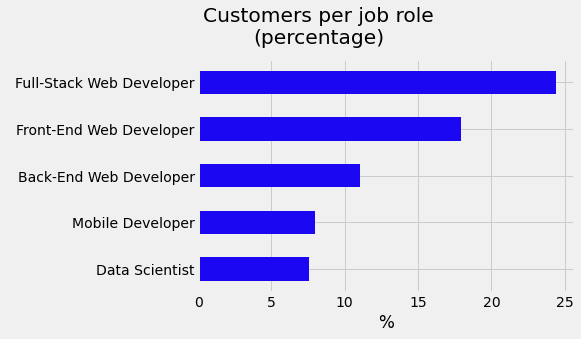

In [38]:
(no_outlier.FirstChoice.value_counts(normalize=True) * 100)[:5][::-1].plot.barh(color='#1b07f2')
plt.xlabel('%')
plt.title('Customers per job role\n(percentage)', x=0.32, y=1.04)
plt.show()

* The majority of users (roughly **53 %**) is interested in **web developer** positions.
* Almost **8 %** in **app and mobile development**
* And **7.60 %** in **data science**

We'll now group for ```FirstChoice``` and see how the ```MoneyForMonth``` behave.

In [39]:
top_3 = no_outlier[no_outlier.FirstChoice.str.contains('Web Developer|Data|Mobile')]

grouped = top_3.groupby('FirstChoice')['MoneyForMonth'].mean().sort_values(ascending=False).to_frame()[:7]
grouped

,MoneyForMonth
FirstChoice,
Full-Stack Web Developer,167.494381
Data Visualization Specialist,166.666667
Back-End Web Developer,155.446741
Front-End Web Developer,143.201978
Mobile Developer,133.230964
Data Engineer,92.518090
Data Scientist,51.665952


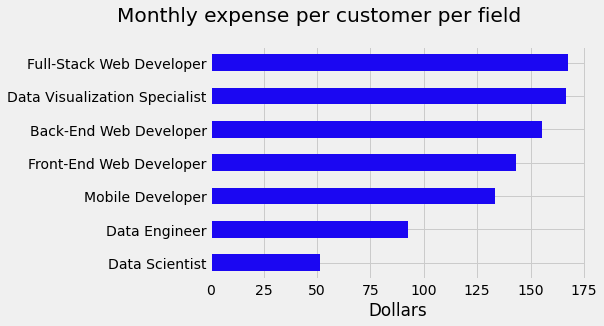

In [40]:
grouped[::-1].plot.barh(color='#1b07f2')
plt.xlabel('Dollars')
plt.ylabel('')
plt.legend().set_visible(False)
plt.title('Monthly expense per customer per field',
          x=0.29,
          y=1.08)
plt.show()

Users, who are interested in web developing, usually spend more money compared to other fields.
This is something we'll take into account for our conclusion.

Now that we know that **USA** and **Canada** are the countries where we want to advertise, how is the distribution for ```FirstChoice``` there?

In [41]:
# filtering for USA or Canada

us_canada = no_outlier.loc[(no_outlier.CountryLive == 'United States of America') | (no_outlier.CountryLive == 'Canada')]  

# filtering for field

us_canada = us_canada.loc[us_canada.FirstChoice.str.contains('Web Developer|Data|Mobile')]

us_canada.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForMonth,FirstChoice
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333,Full-Stack Web Developer
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN

In [42]:
grouped = us_canada.groupby(['CountryLive', 'FirstChoice'],)['MoneyForMonth'].mean().to_frame()

In [43]:
g_1 = grouped['MoneyForMonth'].groupby('CountryLive', group_keys=False).nlargest().to_frame().reset_index()

In [56]:
g_1

,CountryLive,FirstChoice,MoneyForMonth
0,Canada,Mobile Developer,357.142857
1,Canada,Full-Stack Web Developer,101.736111
2,Canada,Front-End Web Developer,87.752525
3,Canada,Back-End Web Developer,53.030303
4,Canada,Data Scientist,0.000000
5,United States of America,Full-Stack Web Developer,200.244675
6,United States of America,Front-End Web Developer,176.899480
7,United States of America,Data Visualization Specialist,166.666667
8,United States of America,Back-End Web Developer,164.959280
9,United States of America,Mobile Developer,148.050351


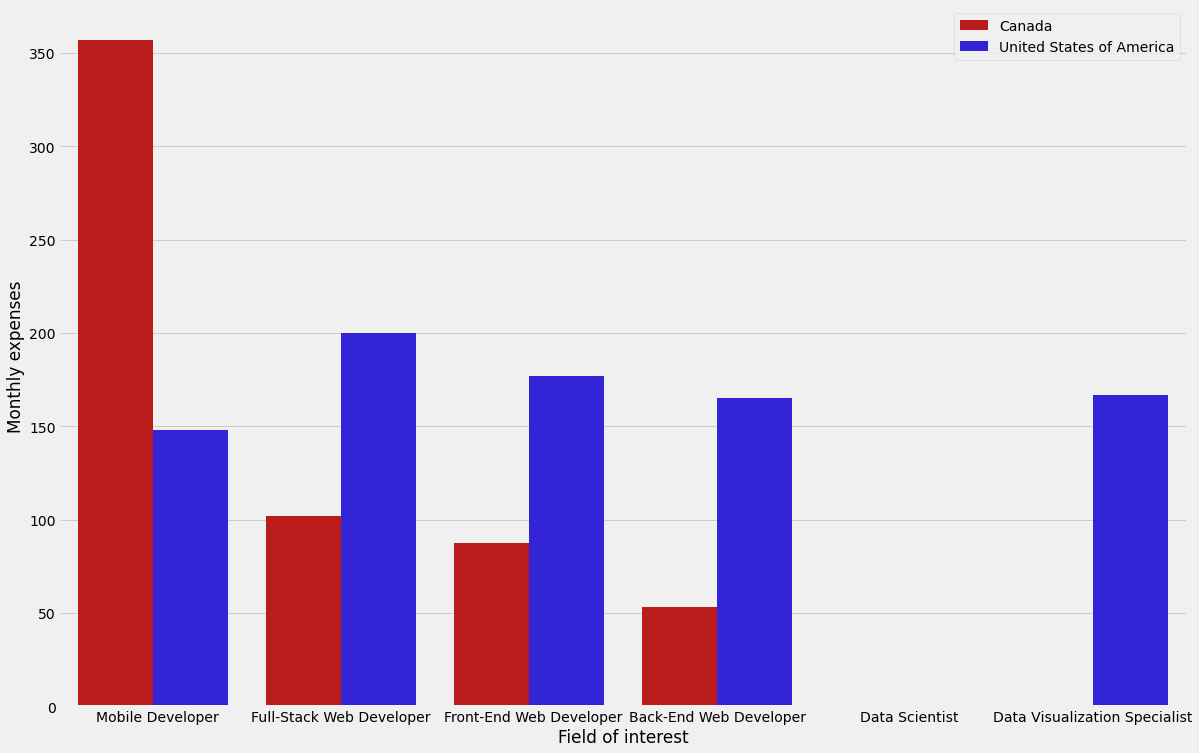

In [82]:
plt.figure(figsize=(18,12))
colors = ["#d40202", "#1b07f2"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='FirstChoice', y='MoneyForMonth', hue='CountryLive', data=g_1)
plt.legend(loc='upper right')
plt.ylabel('Monthly expenses')
plt.xlabel('Field of interest')
plt.show()

## Conclusion

We analyzed codecamp survey and found out some interesting data for our marketing strategies:

* By taking into account the number of users and the average month expense, we can conclude that two countries where we should advertise would be:
    * USA with 3125 customers and an average monthle expense of 159.83 $
    
    * Canada with 260 customers and an average monthly expense of 90.53 $
* Considering our product analysis, the major fields of interest are:
    * **Full stack web-developer**
    
    * **Front end web-developer**
    
    * **Back end web-developer**
    
    * **Mobile app developer**
    
    * **Data scientist**
* If we would establish some specific strategy for each of the two countries, we could suggest to:
    * Run ads about mobile app developer courses in **Canada**
    
    * Run ads about full stack web-developer courses in **USA**